In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import IPython as ip
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
mpl.style.use('ggplot')
mpl.rc('figure', figsize=(7.2, 5.76))
mpl.rc('font', family='Noto Sans CJK TC')
plt.rc('lines', markeredgecolor='white', markeredgewidth=0.75)
plt.rc('patch', edgecolor='white', force_edgecolor=True, linewidth=1)
ip.display.set_matplotlib_formats('svg')

In [3]:
df_fair = sm.datasets.fair.load_pandas().data

In [4]:
df = df_fair

alpha = 0.05
a = df.affairs.quantile(alpha/2)
b = df.affairs.quantile(1-alpha/2)

df = df[(df.affairs >= a) & (df.affairs <= b)]

df_fair_middle95 = df

In [5]:
formula = 'affairs ~ C(rate_marriage) + C(rate_marriage):C(religious)'
df = df_fair
res_ols = smf.ols(formula, df).fit()
res_ols_middle95 = smf.ols(formula, df_fair_middle95).fit()
res_qr = smf.quantreg(formula, df).fit()
res_rlm = smf.rlm(formula, df).fit()

Text(0.5, 1.0, 'Params')

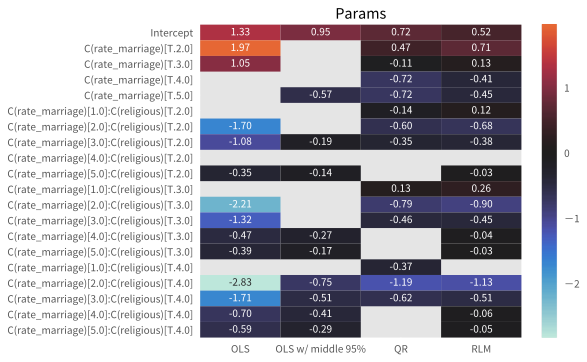

In [6]:
params_ols = res_ols.params
params_ols_middle95 = res_ols_middle95.params
params_qr = res_qr.params
params_rlm = res_rlm.params

params_ols[res_ols.pvalues >= 0.05] = np.nan
params_ols_middle95[res_ols_middle95.pvalues >= 0.05] = np.nan
params_qr[res_qr.pvalues >= 0.05] = np.nan
params_rlm[res_rlm.pvalues >= 0.05] = np.nan

df = (
    params_ols.to_frame('OLS')
    .join(params_ols_middle95.to_frame('OLS w/ middle 95%'))
    .join(params_qr.to_frame('QR'))
    .join(params_rlm.to_frame('RLM'))
)

sns.heatmap(df, center=0, annot=True, fmt='.2f')
plt.title('Params')